In [1]:
"""Critical Value analysis"""

from __future__ import annotations

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

matplotlib.rcParams['font.family'] = "monospace"

%matplotlib inline

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from core.core import decode_filename, save_plot, analysis_filename

In [4]:
basic = [
    "critical_values_results_basic_j12_s2_0",
    "critical_values_results_basic_j15_s2_0",
    "critical_values_results_basic_j15_s3_0",
    "critical_values_results_basic_j25_s5_0"
]

paper = [
    "flexible_auction_fog_j15_s3_0",
    "flexible_auction_fog_j25_s5_0"
]

In [5]:
encoded_filenames = paper
folder = "paper"

In [15]:
"""Algorithm Total price"""
data = []
model_names: List[str] = []
test_name: str = ""

for encoded_filename in encoded_filenames:
    filename, model_name, test_name = decode_filename(folder, encoded_filename)
    model_names.append(model_name)
    
    with open(filename) as file:
        critical_value_data = json.load(file)

        for pos, result in enumerate(critical_value_data):
            best_total_money = max(r['total money'] for r in result.values())
            
            for algorithm_name, critical_value_result in result.items():
                if algorithm_name == "VCG" or algorithm_name == "Fixed VCG":
                    data.append((model_name, pos, algorithm_name, 
                                 critical_value_result['total money'],
                                 critical_value_result['total money'] / best_total_money,
                                 "", "", "", critical_value_result['solve_time']))
                else:
                    data.append((model_name, pos, algorithm_name,
                                 critical_value_result['total money'],
                                 critical_value_result['total money'] / best_total_money,
                                 critical_value_result['value_density'],
                                 critical_value_result['server_selection_policy'],
                                 critical_value_result['resource_allocation_policy'],
                                 critical_value_result['solve_time']))

df = pd.DataFrame(data, columns=['Model', 'Pos', 'Algorithm Name', 'Total Money', 'Best Total Money', 
                                 'Value Density', 'Server Selection Policy',
                                 'Resource Allocation Policy', 'Solve Time'])

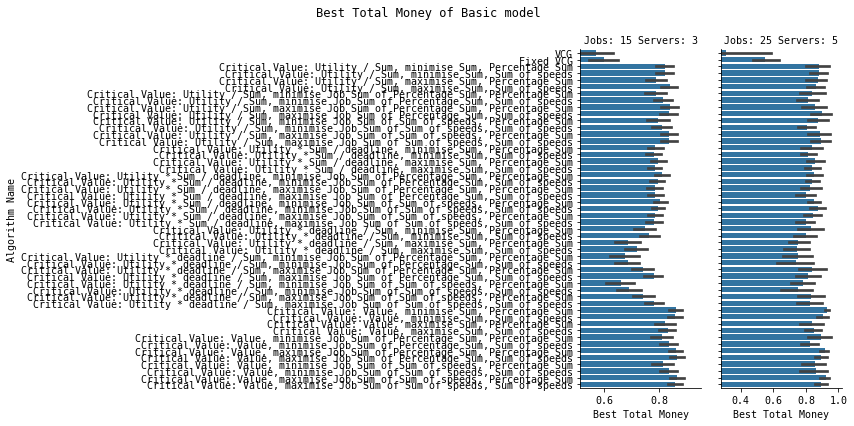

In [16]:
g = sns.FacetGrid(df, col='Model', height=6, sharex=False)
g = g.map(sns.barplot, 'Best Total Money', 'Algorithm Name').set_titles("{col_name}")

for pos, model in enumerate(model_names):
    values = [np.mean(df[(df['Model'] == model) & (df['Algorithm Name'] == algo)]['Best Total Money'])
              for algo in df['Algorithm Name'].unique()]
    g.axes[0, pos].set_xlim(min(values) * 0.9, max(values) * 1.1)
    
g.fig.subplots_adjust(top=0.88)
g.fig.suptitle("{} of {} model".format('Best Total Money', 'Basic'))

g

In [9]:
data = []
model_names: List[str] = []
test_name: str = ""

encoded_filename = encoded_filenames[-1]
filename, model_name, test_name = decode_filename(folder, encoded_filename)
model_names.append(model_name)
    
with open(filename) as file:
    critical_value_data = json.load(file)

    for pos, result in enumerate(critical_value_data):
        for algorithm_name, critical_value_result in result.items():
            for job_name, job_price in critical_value_result['prices'].items():
                if algorithm_name == 'price change 3':
                    data.append((pos, 'Iterative Auction', job_name, job_price))
                else:
                    data.append((pos, algorithm_name, job_name, job_price))
                
df = pd.DataFrame(data, columns=['Pos', 'Algorithm Name', 'Job Name', 'Job Price'])
df

,Pos,Algorithm Name,Job Name,Job Price
0,0,VCG,job 0,22.0
1,0,VCG,job 1,-26.0
2,0,VCG,job 2,-10.0
3,0,VCG,job 3,0.0
4,0,VCG,job 4,-8.0
...,...,...,...,...
9995,7,"Critical Value: Value, maximise Job Sum of Sum...",job 20,0.0
9996,7,"Critical Value: Value, maximise Job Sum of Sum...",job 21,43.0
9997,7,"Critical Value: Value, maximise Job Sum of Sum...",job 22,0.0
9998,7,"Critical Value: Value, maximise Job Sum of Sum...",job 23,0.0


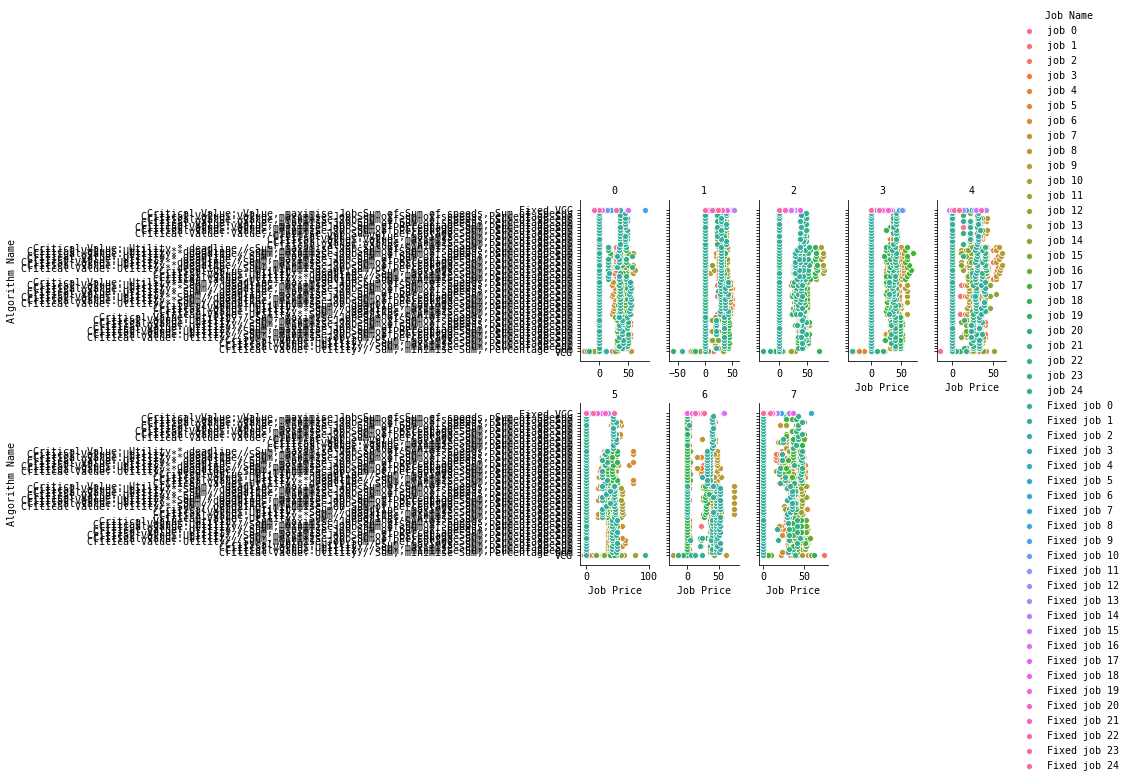

In [10]:
g = sns.FacetGrid(df, col='Pos',col_wrap=5, sharex=False, hue='Job Name')
g = g.map(sns.scatterplot, 'Job Price', 'Algorithm Name')
g.set_titles('{col_name}').add_legend()

g

In [11]:
df1 = df.loc[(df['Pos'] == 20) & (df['Job Price'] > 0)]
df1

,Pos,Algorithm Name,Job Name,Job Price


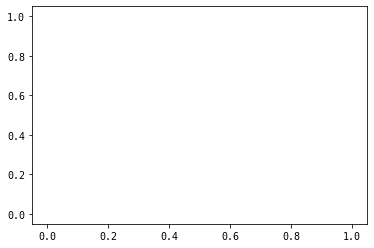

In [12]:
g = sns.scatterplot(data=df1, x='Job Price', y='Algorithm Name', hue='Job Name')
g

AttributeError: 'NoneType' object has no attribute 'remove'

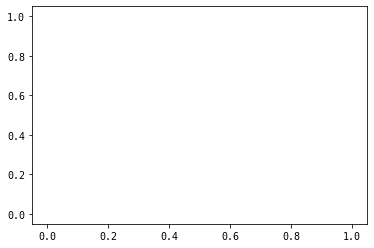

In [13]:
g = sns.scatterplot(data=df1, y='Job Name', x='Job Price', hue='Algorithm Name')
g.legend_.remove()
g

In [ ]:
with open(filename) as file:
    critical_value_data = json.load(file)

    for pos, result in enumerate(critical_value_data):
        for algorithm_name, critical_value_result in result.items():
            for job_name, job_price in critical_value_result['prices'].items():
                if algorithm_name == 'price change 3':
                    data.append((pos, 'Iterative Auction', job_name, job_price))
                else:
                    price = result['price change 3']['prices'][job_name]
                    if price == 0:
                        price = max(r['prices'][job_name] for r in result.values())
                        if price == 0:
                            price = 1
                    data.append((pos, algorithm_name, job_name, job_price / price))
                
df2 = pd.DataFrame(data, columns=['Pos', 'Algorithm Name', 'Job Name', 'Job Price'])
df2

In [ ]:
g = sns.scatterplot(data=df2, y='Job Name', x='Job Price', hue='Algorithm Name')
g.legend_.remove()
g